<a id='1'></a>
#### 1.Loading and preparing Data

In [1]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
import socket
socket.getaddrinfo('localhost', 8080)

[(<AddressFamily.AF_INET6: 23>, 0, 0, '', ('::1', 8080, 0, 0)),
 (<AddressFamily.AF_INET: 2>, 0, 0, '', ('127.0.0.1', 8080))]

In [291]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [3]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [4]:
df = pd.read_csv("train.csv")

In [5]:
df.shape

(20800, 5)

In [6]:
from numpy.random import default_rng

In [7]:
arr_indices_top_drop = default_rng().choice(df.index, size=14000, replace=False)
df = df.drop(index=arr_indices_top_drop)

In [8]:
df.shape

(6800, 5)

In [9]:
# looking and replacing null datas
df.isnull().sum()
df = df.fillna('')

In [33]:
df

id                                              title  \
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
10        10  Obama’s Organizing for Action Partners with So...   
15        15  In Major League Soccer, Argentines Find a Home...   
16        16  Wells Fargo Chief Abruptly Steps Down - The Ne...   
...      ...                                                ...   
20789  20789  Sen. McConnell: The Supreme Court Vacancy Was ...   
20790  20790  Nikki Haley Blasts U.N. Human Rights Office fo...   
20791  20791  Lawyer Who Kept Hillary Campaign Chief Out of ...   
20793  20793  Idiot Who Destroyed Trump Hollywood Star Gets ...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   

                                 author  \
1                       Daniel J. Flynn   
2                    Consortiumnews.com   
10                          Aaron Klein   
15                        Jack Williams   
16     Michael Corkery and Stacy Cowley   
...                                 ...   
20789                Warner Todd Huston   
20790                         Adam Shaw   
20791                 Daniel Greenfield   
20793                       Robert Rich   
20796                  Benjamin Hoffman   

                                                    text  label  \
1      Ever get the feeling your life circles the rou...      0   
2      Why the Truth Might Get You Fired October 29, ...      1   
10     Organizing for Action, the activist group that...      0   
15     Guillermo Barros Schelotto was not the first A...      0   
16     The scandal engulfing Wells Fargo toppled its ...      0   
...                                                  ...    ...   
20789  Senate Majority Leader Mitch McConnell (R, KY)...      0   
20790  U. S Ambassador to the United Nations Nikki Ha...      0   
20791  Lawyer Who Kept Hillary Campaign Chief Out of ...      1   
20793  Share This \nAlthough the vandal who thought i...      1   
20796  When the Green Bay Packers lost to the Washing...      0   

                                                 content  
1      daniel j flynn flynn hillari clinton big woman...  
2                 consortiumnew com truth might get fire  
10     aaron klein obama organ action partner soro li...  
15     jack william major leagu soccer argentin find ...  
16     michael corkeri staci cowley well fargo chief ...  
...                                                  ...  
20789  warner todd huston sen mcconnel suprem court v...  
20790  adam shaw nikki haley blast u n human right of...  
20791  daniel greenfield lawyer kept hillari campaign...  
20793  robert rich idiot destroy trump hollywood star...  
20796  benjamin hoffman n f l playoff schedul matchup...  

[6800 rows x 6 columns]

In [10]:
# merging author name and news title for easier use
df['content'] = df['author']+' '+df['title']
print(df['content'])

1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
10       Aaron Klein Obama’s Organizing for Action Part...
15       Jack Williams In Major League Soccer, Argentin...
16       Michael Corkery and Stacy Cowley Wells Fargo C...
                               ...                        
20789    Warner Todd Huston Sen. McConnell: The Supreme...
20790    Adam Shaw Nikki Haley Blasts U.N. Human Rights...
20791    Daniel Greenfield Lawyer Who Kept Hillary Camp...
20793    Robert Rich Idiot Who Destroyed Trump Hollywoo...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
Name: content, Length: 6800, dtype: object


<a id='2'></a>
### Stemming and Training


In [11]:
# Stemming is the process of reducing a word to Root word
ps= PorterStemmer()
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [ps.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [12]:
df['content'] = df['content'].apply(stemming)

In [13]:
x = df['content'].values
y = df['label'].values

In [14]:
# converting the textual to numerical data for easier use
vectorizer = TfidfVectorizer()
vectorizer.fit(x)

x = vectorizer.transform(x)

In [15]:
feature_names = vectorizer.get_feature_names_out()

In [16]:
y[0]

0

In [17]:
len(feature_names)

10479

In [18]:
X_dense = x.todense()

In [19]:
X_dense

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
inverted_sentences = []
for i in range(X_dense.shape[0]):
    sentence_vector = X_dense[i,:]
    sentence_tokens = [(feature_names[j], sentence_vector[0,j]) for j in range(X_dense.shape[1])]
    sentence = " ".join([token[0] for token in sentence_tokens if token[1] > 0])
    inverted_sentences.append(sentence)

In [266]:
inverted_sentences

['big breitbart campu clinton daniel flynn hillari woman',
 'com consortiumnew fire get might truth',
 'airstrik civilian identifi jessica kill purkiss singl us',
 'adulteri death fiction howard iranian jail portnoy stone stori unpublish woman',
 'associ back channel courtesi megan new plan russia scott shane time trump twohey ukrain york',
 'aaron action agenda disrupt indivis klein link obama organ partner soro trump',
 'amando arctic base discov flavio hunter militari nazi photo research russian secret treasur',
 'ditz jason link offici russia see trump us',
 'abruptli chief corkeri cowley fargo michael new staci step time well york',
 'black bust cop fake home invas live massachusett matter pin robberi wife',
 'ban helfand histor ira nuclear nuke treati un weapon',
 'aaron ali breitbart exclus follow islam klein manchest massacr shake state support terrorist vow wake west',
 'behind clifford field job krauss left lull new oil price rebound texa time york',
 'awr blame breitbart chi

### train test split

In [13]:
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, stratify=y, random_state=2)

### Creating model

In [21]:
model = LogisticRegression()
model.fit(x,y)

LogisticRegression()

### XAI

In [22]:
import shap

In [23]:
explainer = shap.Explainer(model, x)
shap_values = explainer(x)

In [51]:
len(shap_values)

5

In [270]:
vocab = vectorizer.get_feature_names_out()

In [70]:
print(vocab)

['aargh' 'aaron' 'ab' ... 'zw' 'zweden' 'zweit']


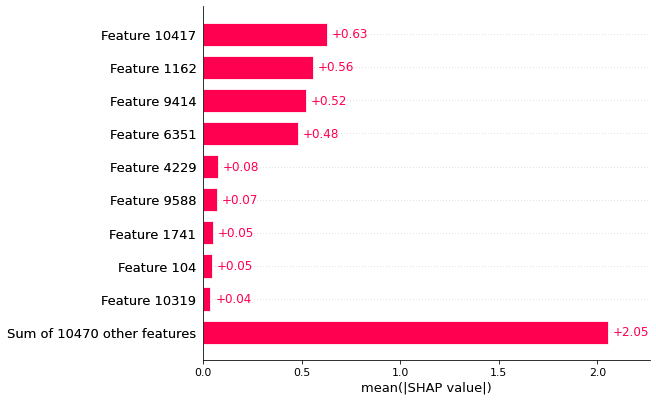

In [24]:
shap.plots.bar(shap_values)

In [25]:
import matplotlib.pyplot as plt

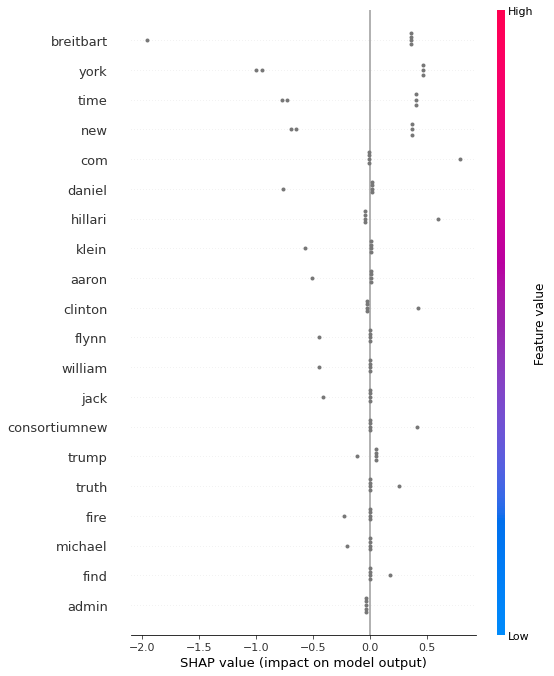

In [26]:
test_idx = 0
test_instances = x[test_idx:test_idx+5]
shap_values = explainer.shap_values(test_instances)

# plot the Shapley values using a summary plot
feature_names = vectorizer.get_feature_names_out()
shap.summary_plot(shap_values, test_instances, feature_names=feature_names)

In [27]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], test_instances[0].toarray(), feature_names=feature_names)

In [30]:
from lime import lime_text
from sklearn.pipeline import make_pipeline
c = make_pipeline(vectorizer, model)

In [49]:
# type(df["label"][0])

In [48]:
# print(c.predict_proba([df["content"][0]]))

In [34]:
class_names = ['real','fake']

In [35]:
from lime.lime_text import LimeTextExplainer
explainerlime = LimeTextExplainer(class_names=class_names)

In [36]:
x1 = df['content']

In [37]:
x1 = x1.tolist()

In [38]:
y1 = y.tolist()

In [39]:
y1 = np.array(y1)

In [40]:
idx = 0
exp = explainerlime.explain_instance(x1[idx], c.predict_proba, num_features=10)
print('Document id: %d' % idx)
print('Probability(fake) =', c.predict_proba([x1[idx]])[0,1])
print('True class: %s' % class_names[y1[idx]])

Document id: 0
Probability(fake) = 0.22652533369664798
True class: real


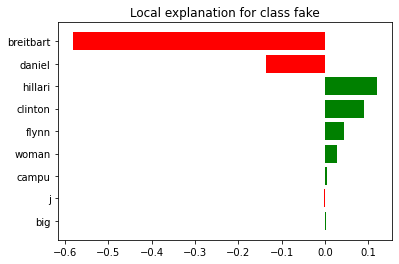

In [41]:
%matplotlib inline
fig = exp.as_pyplot_figure()

In [42]:
exp.show_in_notebook(text=False)

In [43]:
exp.show_in_notebook(text=True)

In [237]:

# # Compute SHAP values for all features in the dataset
# explainer = shap.Explainer(model,x1)
# shap_values = explainer(x1)

# # # Plot the global feature importance using a summary plot
# # shap.summary_plot(shap_values, x2, plot_type="bar")


In [44]:
x2 = x  # extract the first (and only) row
x2 = x2.reshape(-1, 1)

In [45]:
import eli5
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
eli5.show_weights(model,vec=inverted_sentences,top=15,feature_names=feature_names,
                  target_names=['real','fake'])

In [46]:
import eli5
eli5.show_prediction(model, x1[0], vec=vectorizer,feature_names=feature_names,
                     target_names=['real','fake'],top=15)